# Laboratory Task 4 – PyTorch Regression

Instruction: Train a linear regression model in PyTorch using a regression dataset. Use the following parameters.

- Criterion: MSE Loss
- Fully Connected Layers x 2
- Batch Size: 8
- Optimizer: SGD
- Epoch: 1000

In [2]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Generate a simple regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

# Scale inputs and outputs for stable training
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y.reshape(-1, 1))

# Convert to tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader
BATCH_SIZE = 8
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
# Two fully connected layers as specified
class LinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 8)  # input layer → hidden layer
        self.fc2 = nn.Linear(8, 1)  # hidden layer → output layer
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# Initialize model
model = LinearRegressor()

In [ ]:
# Define Loss Function and Optimizer
criterion = nn.MSELoss()                # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 1000

In [6]:
# Training Loop
loss_history = []

for epoch in range(EPOCHS):
    for inputs, targets in train_loader:
        # Forward pass
        preds = model(inputs)
        loss = criterion(preds, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss_history.append(loss.item())

    # Display every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{EPOCHS}] - Loss: {loss.item():.6f}")

Epoch [100/1000] - Loss: 0.034642
Epoch [200/1000] - Loss: 0.030637
Epoch [300/1000] - Loss: 0.040967
Epoch [400/1000] - Loss: 0.009145
Epoch [500/1000] - Loss: 0.030011
Epoch [600/1000] - Loss: 0.068618
Epoch [700/1000] - Loss: 0.040779
Epoch [800/1000] - Loss: 0.047060
Epoch [900/1000] - Loss: 0.062211
Epoch [1000/1000] - Loss: 0.020562



Final Test MSE Loss: 0.036329


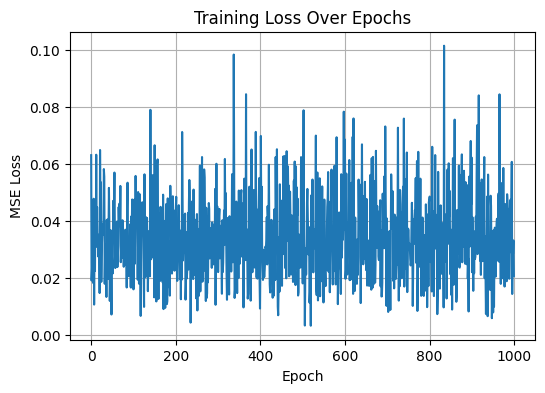

In [7]:
# Evaluate model on test data
model.eval()
with torch.no_grad():
    preds = model(X_test)
    test_loss = criterion(preds, y_test)

print(f"\nFinal Test MSE Loss: {test_loss.item():.6f}")

# Plot training loss
plt.figure(figsize=(6,4))
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

Sample Predictions:
 tensor([[-1.4498],
        [ 0.1011],
        [-1.5162],
        [-0.2991],
        [-1.1715],
        [ 0.6983],
        [ 1.9893],
        [ 0.9049]])
Actual Targets:
 tensor([[-1.6125],
        [ 0.2723],
        [-1.6187],
        [-0.0782],
        [-1.3716],
        [ 0.7374],
        [ 1.7588],
        [ 0.9156]])


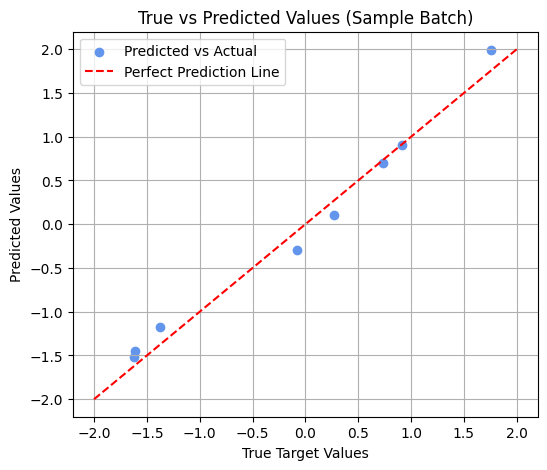

In [9]:
# Compare predicted vs. true target values (visual + print)
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    sample_inputs, sample_targets = next(iter(train_loader))
    predictions = model(sample_inputs)

# Print a few values
print("Sample Predictions:\n", predictions[:8])
print("Actual Targets:\n", sample_targets[:8])

# Visualization
plt.figure(figsize=(6,5))
plt.scatter(sample_targets.numpy(), predictions.numpy(), color='cornflowerblue', label='Predicted vs Actual')
plt.plot([-2, 2], [-2, 2], 'r--', label='Perfect Prediction Line')  # reference line
plt.xlabel("True Target Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Sample Batch)")
plt.legend()
plt.grid(True)
plt.show()

#### Reflection

In this lab, I implemented a two-layer linear regression model using PyTorch. I learned how to organize a basic machine learning workflow — from data preprocessing, to model definition, loss computation, and optimization with SGD. Even though this model is simple, it clearly shows how PyTorch handles tensor gradients and parameter updates automatically through backpropagation. The plotted training loss confirms that the model gradually minimizes the error across epochs.
